# 二维胶粒的耗尽力
+ slug: two-dimension-depletion-force-between-colloids
+ date: 2015-09-15
+ tags: soft matter

## 基本数据结构
+ 曲线由分段圆弧组成
+ 直线可以看作是一种特殊的半径为无穷大的圆弧

### 优良性质
__引理__ 分段圆弧扩展之后的曲线依然是分段圆弧
+ 直线扩展后还是直线
+ 半径为$R$的圆扩展$d$后是半径为$R+d$的圆
+ 转接点扩展$d$后产生的新的曲线是圆$d$
+ 综上，无论怎么扩展，扩展前后曲线类型不变

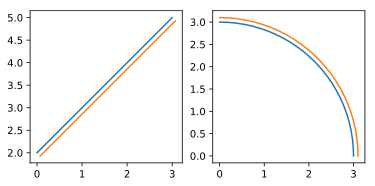

In [2]:
from deplete.colloids import *
L, C = Line([0,2], [3,5]), Circle(3, [0,0], [0, pi/2])
subplot(121)
L.draw()
L.extend(0.1).draw()
axis('square');
subplot(122)
C.draw()
C.extend(0.1).draw()
axis('square');

## 扩展曲线
### Naive的扩展方式
+ 设定好定向，对应图像轮廓由一系列矢量弧段$a_1, a_2,\ldots a_n$组成
+ 普通段普通扩展$a_i\rightarrow a_i'$
     + 区分角度增加/减少的区别
         - 角度**增加**的时候半径为正$r=|r|$
         - 角度**减少**的时候半径为负$r=-|r|$
     + 做变换$r\rightarrow r'=r+d$

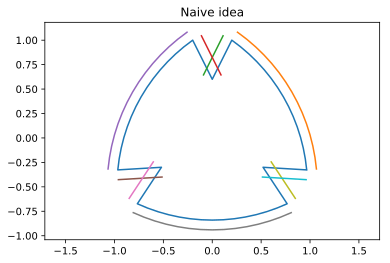

In [3]:
c=triangloid(1, 1, 0.2, -0.4)
c.draw(label='colloid')
title('Naive idea')
for seg in c:
    seg.extend(0.1).draw()
axis('equal');

### 处理转折点
+ 如果顺拐，即$a_i\times a_{i+1}>0$，转折段扩展出圆弧
+ 如果逆拐，即$a_i\times a_{i+1}<0$，转折段可以扩展出圆弧，但是直线更适合处理，因为终究需要剪除

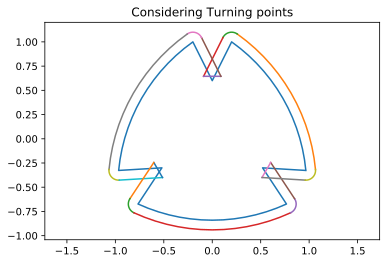

In [4]:
c.draw(label='colloid')
title('Considering Turning points')
c.offset_raw(0.1).draw_each()
axis('equal');

### 终极扩展方式
+ __问题__：我们现在的曲线，已经包含了扩展后的边界，但是有部分面积被环绕了多次
+ __解决方法__：剪除重复的正面积，保留真正的边界
+ __简化__方法：即最大的正边界
+ __BUG__: 某些凹陷严重情形下扩展会有bug，蚀刻时也会有bug

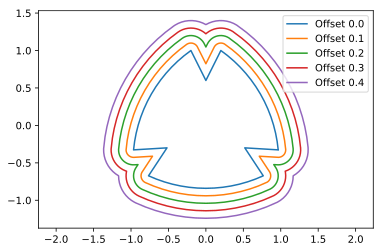

In [10]:
off=linspace(0, 0.4, 5)
for o in off:
    c.offset(o).draw(label='Offset {:.1f}'.format(o))
legend(loc="upper right")
axis('equal');

## 曲线相交
Depletion把两个当成一个整体

In [11]:
import pandas as pd
area=[c.offset(o).area() for o in off]
peri=[c.offset(o).perimeter() for o in off]
pd.DataFrame({"Offset": off, "Area": area, "Perimeter": peri})

,Area,Offset,Perimeter
0,2.423661,0.0,7.423733
1,3.170664,0.1,7.516340
2,3.926929,0.2,7.608948
3,4.699730,0.3,7.938916
4,5.521669,0.4,8.510362
